# Visualising convnets: intermediate activations

In [8]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_1.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [35]:
import os
img_path = os.getcwd() + "/../data/DogsCatsData/test/cats/cat.1700.jpg"

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)
img_tensor /= 255  # the following imshow wouldn't work without this normalization

(150, 150, 3)
(1, 150, 150, 3)


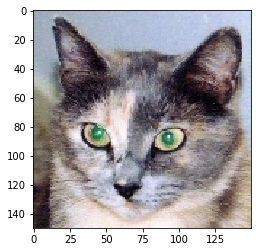

In [36]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

We want to visualize the output of all the Conv and MaxPool layers in our model...

In [31]:
from keras import models

In [32]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [50]:
activations = activation_model.predict(img_tensor)

We can plot a few different channels of the first activation of the model. They all show a different activation, meaning they're detecting different details of the image (eg. vertical edges, horizontal edges, round forms, etc..)

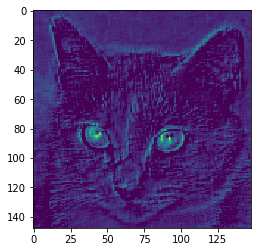

In [61]:
def plot_channel(channel_num=0):
    '''
    Plots the channel with number `channel_num` of the first activation in the model (layer 1)
    '''
    layer1_activation = activations[0][0, :, :, channel_num]
    layer1_activation.shape  # (148, 148)
    plt.imshow(layer1_activation)
    plt.show()

plot_channel(8)

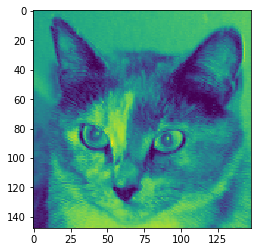

In [63]:
plot_channel(9)

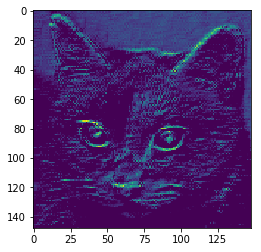

In [65]:
plot_channel(10)

Even better, we can plot all channels of all activations in the model together. Here channels are plotted side-by-side.

(1, 148, 148, 32) conv2d_1
big_image.shape: (296, 2368)


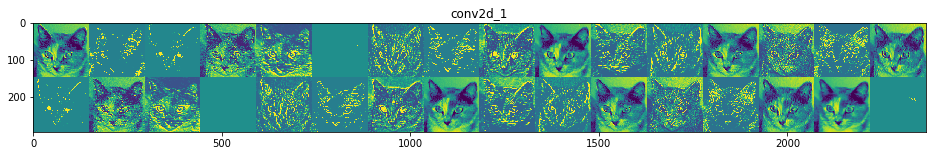

(1, 74, 74, 32) max_pooling2d_1
big_image.shape: (148, 1184)


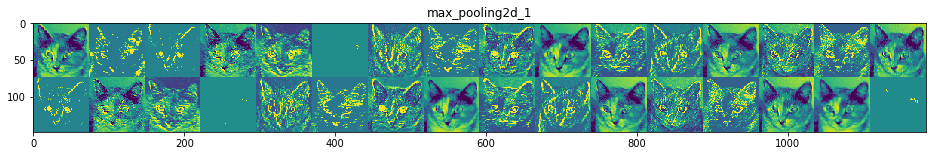

(1, 72, 72, 64) conv2d_2
big_image.shape: (288, 1152)


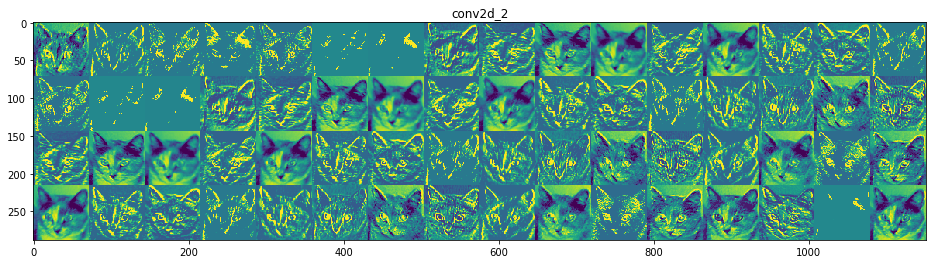

(1, 36, 36, 64) max_pooling2d_2
big_image.shape: (144, 576)


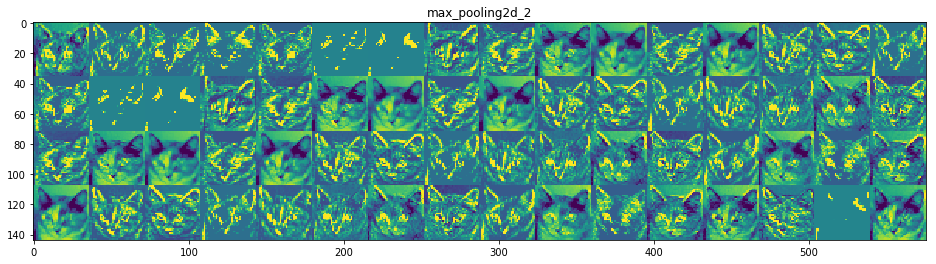

(1, 34, 34, 128) conv2d_3
big_image.shape: (272, 544)


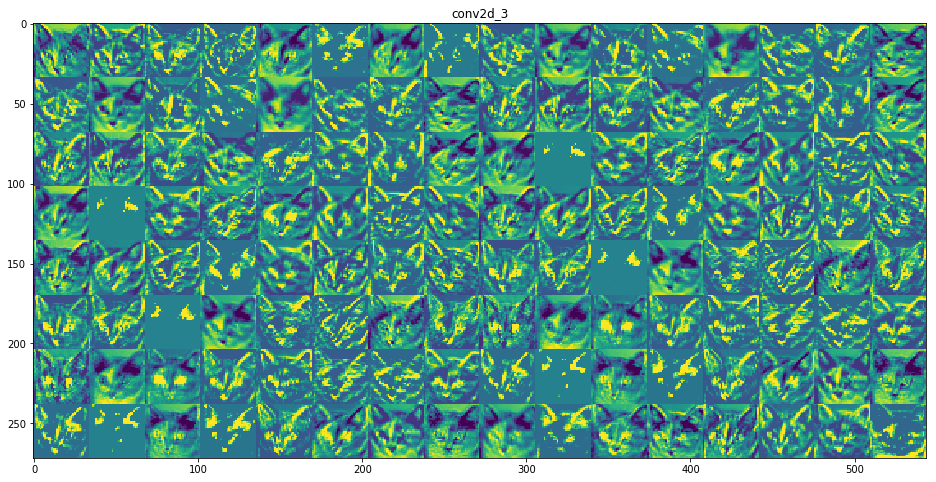

(1, 17, 17, 128) max_pooling2d_3
big_image.shape: (136, 272)


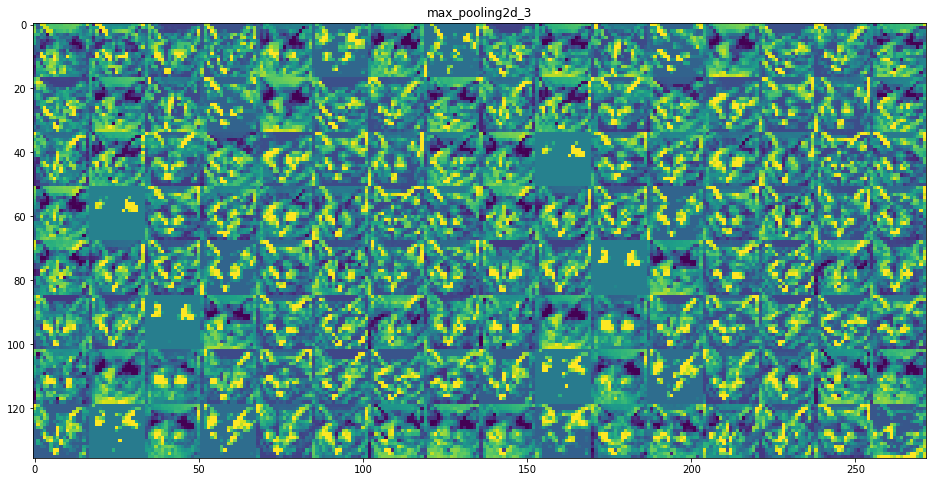

(1, 15, 15, 128) conv2d_4
big_image.shape: (120, 240)


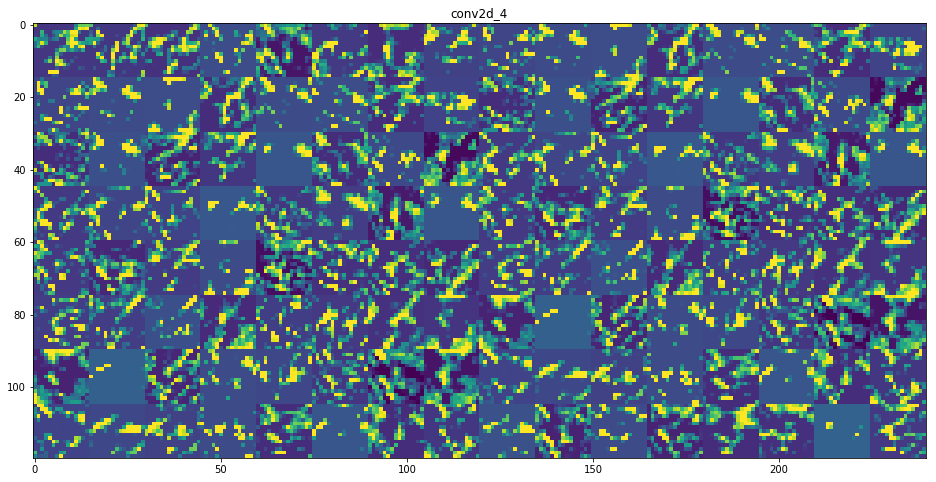

(1, 7, 7, 128) max_pooling2d_4
big_image.shape: (56, 112)


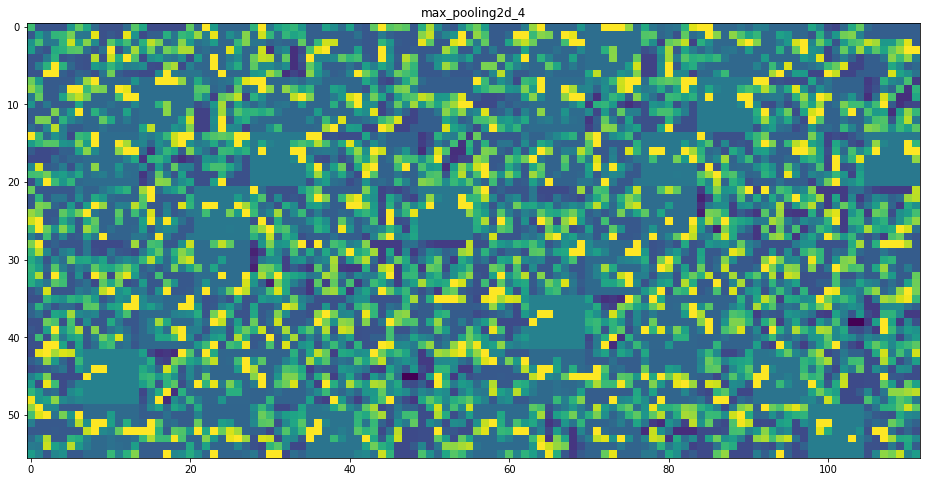

In [95]:
layer_names = [layer.name for layer in model.layers[:8]]

for act, name in zip(activations, layer_names):
    print(act.shape, name)
    
    # We can have 16 images in a single row
    num_cols = 16
    num_rows = int(act.shape[3] / num_cols)
    size = act.shape[1]
    
    big_image = np.zeros((num_rows * size, num_cols * size))
    print('big_image.shape:', big_image.shape)
    for row in range(num_rows):
        for col in range(num_cols):
#             print(f'row, col: ({row}, {col})')
#             print('Channel no. ', row * num_rows + col)

            # Post process images to make them more visible
            channel_image = act[0, :, :, row * num_rows + col]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
#             print('Indices: %d: %d, %d : %d.' % (col * size, (col + 1) * size, row * size, (row + 1) * size))
            big_image[row * size: (row + 1) * size, col * size: (col + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * big_image.shape[1], scale * big_image.shape[0]))
    plt.title(name)
    plt.grid(False)
    plt.imshow(big_image, aspect='auto', cmap='viridis')
    plt.show()
    
    
    

I'm not sure if the model I use from file is trained well - my images don't match precisely the ones in the book. Need to try and retrain the model.